# PIVPy example

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../../')

In [3]:
from pivpy import io, graphics, pivpy

In [11]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'
variables, units, rows, cols, dt, frame = io.parse_header(filename)
data = io.loadvec(filename,rows,cols)

Run000001.T000.D000.P000.H001.L.vec 1


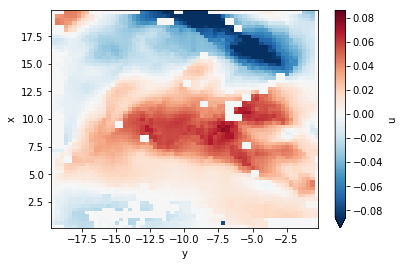

In [12]:
data['u'].plot(robust=True)

In [19]:
# data.to_netcdf('test.nc')

In [17]:
data.u.shape

(1, 63, 63)

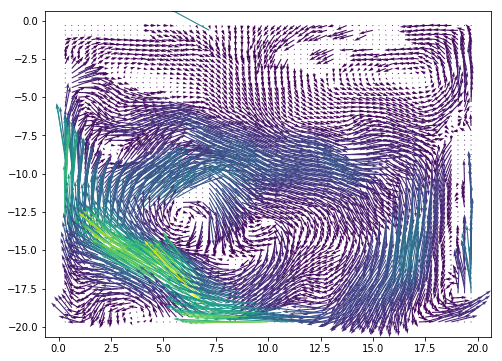

In [30]:
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[0,:,:], data.v[0,:,:] ,data.u[0,:,:]**2 + data.v[0,:,:]**2,scale=.75)

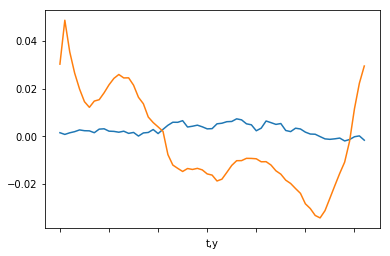

In [31]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()

In [32]:
data  = io.load_directory('../data')

Run000001.T000.D000.P000.H001.L.vec 1


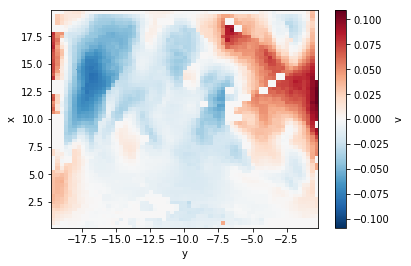

In [34]:
data.isel(t=0)['v'].plot()

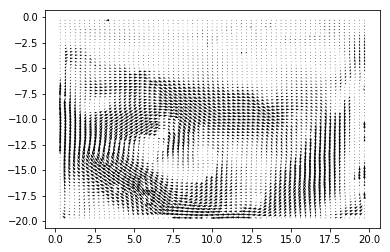

In [35]:
plt.quiver(data['x'],data['y'],data.u.mean(dim='t'),data.v.mean(dim='t'))

In [42]:
data.piv.average

<xarray.Dataset>
Dimensions:  (x: 63, y: 63)
Coordinates:
  * x        (x) float64 0.3125 0.625 0.9374 1.25 1.562 1.875 2.187 2.5 ...
  * y        (y) float64 -0.3125 -0.625 -0.9374 -1.25 -1.562 -1.875 -2.187 ...
Data variables:
    u        (x, y) float64 0.0 0.007812 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    v        (x, y) float64 0.0 2.04e-05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    cnc      (x, y) float64 -1.8 -0.2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...

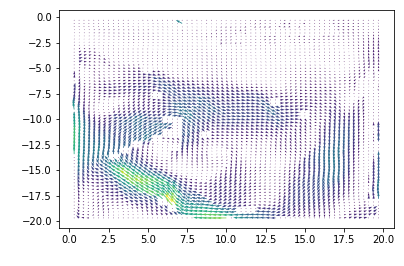

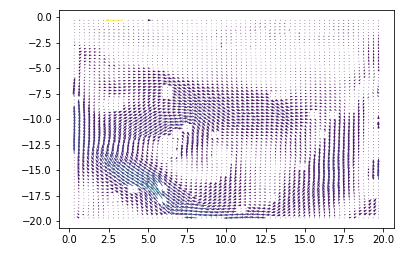

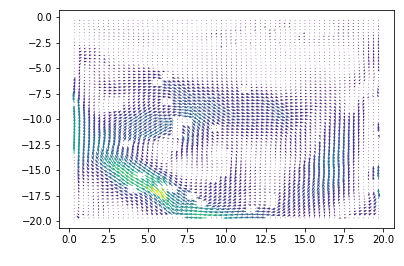

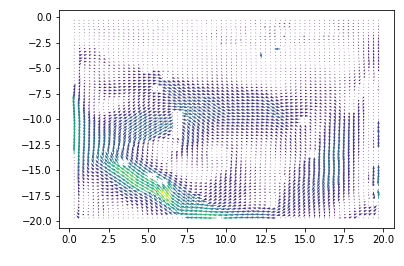

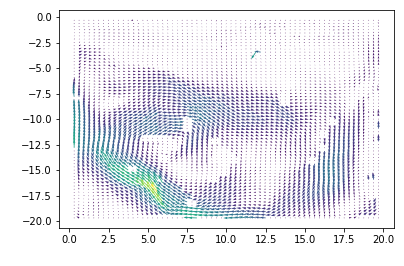

In [43]:
graphics.showf(data)

In [44]:
# equivalent to averf 
graphics.showf(data.mean(dim='t'),variables = data.attrs['variables'], units=data.attrs['units'])

KeyError: 't'

<Figure size 432x288 with 0 Axes>